# clustering 

In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib 한글 문제
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

import warnings
warnings.filterwarnings('ignore')

In [42]:
# 데이터 로드 
df = pd.read_csv("master_cluster.csv")
df

matchId  win  championName_Aatrox  championName_Ahri  \
0      KR_4870274470    0                  0.0                0.0   
1      KR_4870274470    1                  0.0                0.0   
2      KR_4901175026    0                  0.0                0.0   
3      KR_4901175026    1                  0.0                0.0   
4      KR_4944273316    0                  0.0                0.0   
...              ...  ...                  ...                ...   
51293  KR_5560972397    1                  0.0                0.0   
51294  KR_5560981091    0                  0.0                0.0   
51295  KR_5560981091    1                  0.0                0.0   
51296  KR_5560981811    0                  0.0                0.0   
51297  KR_5560981811    1                  0.0                0.0   

       championName_Akali  championName_Akshan  championName_Alistar  \
0                     0.0                  0.0                   0.0   
1                     0.0                  0.0                   0.0   
2                     0.0                  0.0                   0.0   
3                     0.2                  0.0                   0.0   
4                     0.0                  0.0                   0.2   
...                   ...                  ...                   ...   
51293                 0.0                  0.0                   0.0   
51294                 0.0                  0.0                   0.0   
51295                 0.0                  0.0                   0.0   
51296                 0.0                  0.0                   0.2   
51297                 0.0                  0.0                   0.0   

       championName_Amumu  championName_Anivia  championName_Annie  ...  \
0                     0.0                  0.0                 0.0  ...   
1                     0.0                  0.0                 0.0  ...   
2                     0.0                  0.0                 0.0  ...   
3                     0.0                  0.0                 0.0  ...   
4                     0.0                  0.0                 0.0  ...   
...                   ...                  ...                 ...  ...   
51293                 0.2                  0.0                 0.0  ...   
51294                 0.0                  0.0                 0.0  ...   
51295                 0.0                  0.0                 0.0  ...   
51296                 0.0                  0.0                 0.0  ...   
51297                 0.0                  0.0                 0.0  ...   

       championName_Zed  championName_Ziggs  championName_Zilean  \
0                   0.0                 0.0                  0.0   
1                   0.0                 0.0                  0.0   
2                   0.0                 0.0                  0.0   
3                   0.0                 0.0                  0.0   
4                   0.0                 0.0                  0.0   
...                 ...                 ...                  ...   
51293               0.0                 0.0                  0.0   
51294               0.0                 0.0                  0.0   
51295               0.0                 0.0                  0.2   
51296               0.0                 0.2                  0.0   
51297               0.0                 0.0                  0.0   

       championName_Zoe  championName_Zyra  teamId  \
0                   0.0                0.0     200   
1                   0.0                0.0     100   
2                   0.0                0.0     100   
3                   0.0                0.0     200   
4                   0.0                0.0     100   
...                 ...                ...     ...   
51293               0.0                0.0     200   
51294               0.2                0.0     200   
51295               0.0                0.0     100   
51296               0.0                0.0     200   
51297  

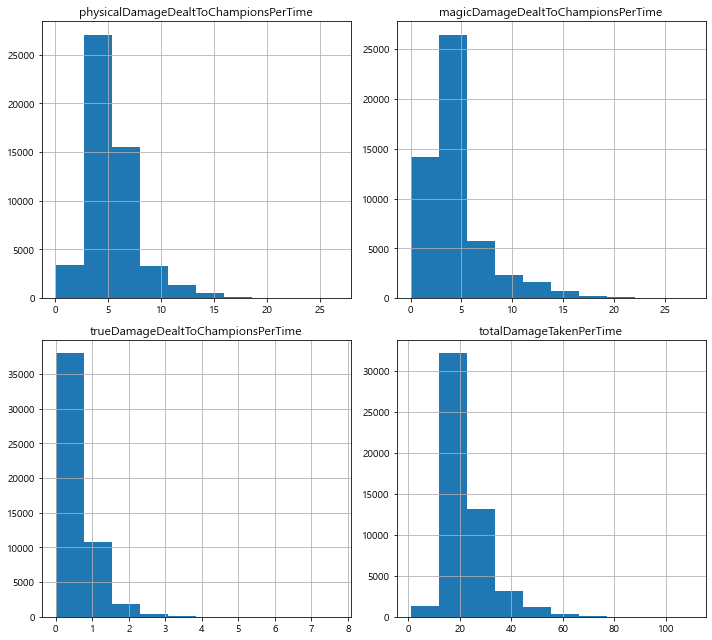

In [43]:
# 시각화할 변수만 선택
df[['physicalDamageDealtToChampionsPerTime',
       'magicDamageDealtToChampionsPerTime',
       'trueDamageDealtToChampionsPerTime',
        'totalDamageTakenPerTime']].hist(figsize=(10,9))
plt.tight_layout()
plt.show()

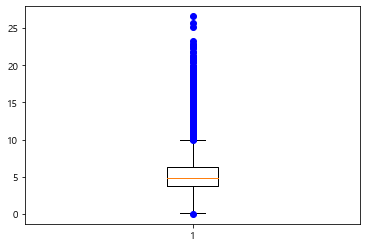

In [44]:
# 데이터 값이 한쪽으로 치중되어 있는지 확인
fig, ax = plt.subplots()
ax.boxplot([df['physicalDamageDealtToChampionsPerTime']], sym = 'bo') 
plt.show()

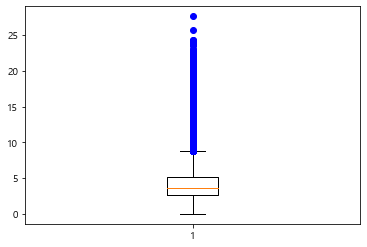

In [45]:
fig, ax = plt.subplots()
ax.boxplot([df['magicDamageDealtToChampionsPerTime']], sym = 'bo') 
plt.show()

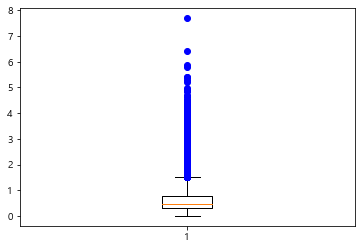

In [46]:
fig, ax = plt.subplots()
ax.boxplot([df['trueDamageDealtToChampionsPerTime']], sym = 'bo') 
plt.show()

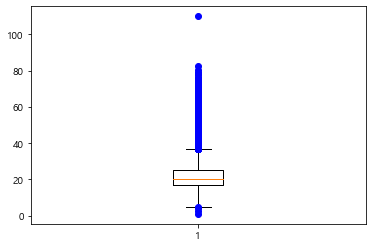

In [47]:
fig, ax = plt.subplots()
ax.boxplot([df['totalDamageTakenPerTime']], sym = 'bo') 
plt.show()

In [48]:
df['physicalDamageDealtToChampionsPerTime_log'] = np.log1p(df['physicalDamageDealtToChampionsPerTime'])
df['magicDamageDealtToChampionsPerTime_log'] = np.log1p(df['magicDamageDealtToChampionsPerTime'])
df['trueDamageDealtToChampionsPerTime_log'] = np.log1p(df['trueDamageDealtToChampionsPerTime'])
df['totalDamageTakenPerTime_log'] = np.log1p(df['totalDamageTakenPerTime'])

df

matchId  win  championName_Aatrox  championName_Ahri  \
0      KR_4870274470    0                  0.0                0.0   
1      KR_4870274470    1                  0.0                0.0   
2      KR_4901175026    0                  0.0                0.0   
3      KR_4901175026    1                  0.0                0.0   
4      KR_4944273316    0                  0.0                0.0   
...              ...  ...                  ...                ...   
51293  KR_5560972397    1                  0.0                0.0   
51294  KR_5560981091    0                  0.0                0.0   
51295  KR_5560981091    1                  0.0                0.0   
51296  KR_5560981811    0                  0.0                0.0   
51297  KR_5560981811    1                  0.0                0.0   

       championName_Akali  championName_Akshan  championName_Alistar  \
0                     0.0                  0.0                   0.0   
1                     0.0                  0.0                   0.0   
2                     0.0                  0.0                   0.0   
3                     0.2                  0.0                   0.0   
4                     0.0                  0.0                   0.2   
...                   ...                  ...                   ...   
51293                 0.0                  0.0                   0.0   
51294                 0.0                  0.0                   0.0   
51295                 0.0                  0.0                   0.0   
51296                 0.0                  0.0                   0.2   
51297                 0.0                  0.0                   0.0   

       championName_Amumu  championName_Anivia  championName_Annie  ...  \
0                     0.0                  0.0                 0.0  ...   
1                     0.0                  0.0                 0.0  ...   
2                     0.0                  0.0                 0.0  ...   
3                     0.0                  0.0                 0.0  ...   
4                     0.0                  0.0                 0.0  ...   
...                   ...                  ...                 ...  ...   
51293                 0.2                  0.0                 0.0  ...   
51294                 0.0                  0.0                 0.0  ...   
51295                 0.0                  0.0                 0.0  ...   
51296                 0.0                  0.0                 0.0  ...   
51297                 0.0                  0.0                 0.0  ...   

       championName_Zyra  teamId  physicalDamageDealtToChampionsPerTime  \
0                    0.0     200                               6.780758   
1                    0.0     100                              10.628426   
2                    0.0     100                               4.162932   
3                    0.0     200                               5.937483   
4                    0.0     100                               4.805683   
...                  ...     ...                                    ...   
51293                0.0     200                               9.928962   
51294                0.0     200                               4.019429   
51295                0.0     100                               8.548952   
51296                0.0     200                               2.232054   
51297                0.0     100                               4.597313   

       magicDamageDealtToChampionsPerTime  trueDamageDealtToChampionsPerTime  \
0                               19.412828                           1.090233   
1                               12.233673                           2.085131   
2                                5.258645                           0.506501   
3                                6.063347                           0.877547   
4                                3.156022                           1.564276   
...                                  

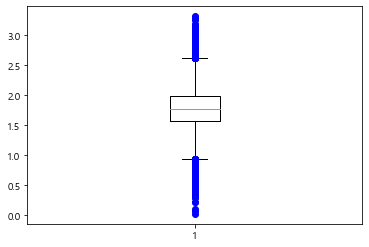

In [49]:
# 잘되었나 확인
fig, ax = plt.subplots()
ax.boxplot([df['physicalDamageDealtToChampionsPerTime_log']], sym = 'bo') 
plt.show()

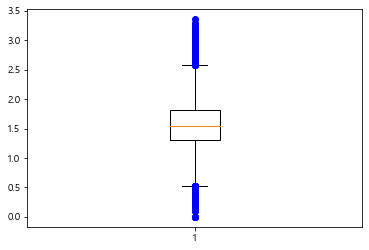

In [50]:
fig, ax = plt.subplots()
ax.boxplot([df['magicDamageDealtToChampionsPerTime_log']], sym = 'bo') 
plt.show()

In [51]:
fig, ax = plt.subplots()
ax.boxplot([df['trueDamageDealtToChampionsPerTime_log']], sym = 'bo') 
plt.show()

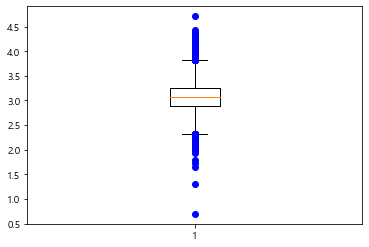

In [52]:
fig, ax = plt.subplots()
ax.boxplot([df['totalDamageTakenPerTime_log']], sym = 'bo') 
plt.show()

In [53]:
# 아웃라이어 drop
df2 = df.query('totalDamageTakenPerTime_log >= 1').reset_index(drop=True)
df2

matchId  win  championName_Aatrox  championName_Ahri  \
0      KR_4870274470    0                  0.0                0.0   
1      KR_4870274470    1                  0.0                0.0   
2      KR_4901175026    0                  0.0                0.0   
3      KR_4901175026    1                  0.0                0.0   
4      KR_4944273316    0                  0.0                0.0   
...              ...  ...                  ...                ...   
51292  KR_5560972397    1                  0.0                0.0   
51293  KR_5560981091    0                  0.0                0.0   
51294  KR_5560981091    1                  0.0                0.0   
51295  KR_5560981811    0                  0.0                0.0   
51296  KR_5560981811    1                  0.0                0.0   

       championName_Akali  championName_Akshan  championName_Alistar  \
0                     0.0                  0.0                   0.0   
1                     0.0                  0.0                   0.0   
2                     0.0                  0.0                   0.0   
3                     0.2                  0.0                   0.0   
4                     0.0                  0.0                   0.2   
...                   ...                  ...                   ...   
51292                 0.0                  0.0                   0.0   
51293                 0.0                  0.0                   0.0   
51294                 0.0                  0.0                   0.0   
51295                 0.0                  0.0                   0.2   
51296                 0.0                  0.0                   0.0   

       championName_Amumu  championName_Anivia  championName_Annie  ...  \
0                     0.0                  0.0                 0.0  ...   
1                     0.0                  0.0                 0.0  ...   
2                     0.0                  0.0                 0.0  ...   
3                     0.0                  0.0                 0.0  ...   
4                     0.0                  0.0                 0.0  ...   
...                   ...                  ...                 ...  ...   
51292                 0.2                  0.0                 0.0  ...   
51293                 0.0                  0.0                 0.0  ...   
51294                 0.0                  0.0                 0.0  ...   
51295                 0.0                  0.0                 0.0  ...   
51296                 0.0                  0.0                 0.0  ...   

       championName_Zyra  teamId  physicalDamageDealtToChampionsPerTime  \
0                    0.0     200                               6.780758   
1                    0.0     100                              10.628426   
2                    0.0     100                               4.162932   
3                    0.0     200                               5.937483   
4                    0.0     100                               4.805683   
...                  ...     ...                                    ...   
51292                0.0     200                               9.928962   
51293                0.0     200                               4.019429   
51294                0.0     100                               8.548952   
51295                0.0     200                               2.232054   
51296                0.0     100                               4.597313   

       magicDamageDealtToChampionsPerTime  trueDamageDealtToChampionsPerTime  \
0                               19.412828                           1.090233   
1                               12.233673                           2.085131   
2                                5.258645                           0.506501   
3                                6.063347                           0.877547   
4                                3.156022                           1.564276   
...                                  

In [54]:
df2[['physicalDamageDealtToChampionsPerTime_log',
       'magicDamageDealtToChampionsPerTime_log',
       'trueDamageDealtToChampionsPerTime_log',
        'totalDamageTakenPerTime_log']].hist(figsize=(10,9))
plt.tight_layout()
plt.show()

# k-평균 군집화모형 구축

In [55]:
# 분석에 사용할 값을 정규 분포로 스케일링
from sklearn.cluster import KMeans # K-Means
from sklearn.metrics import silhouette_score, silhouette_samples # 실루엣 계수 계산
from sklearn.preprocessing import StandardScaler

X_features = df2[['physicalDamageDealtToChampionsPerTime_log',
       'magicDamageDealtToChampionsPerTime_log',
       'trueDamageDealtToChampionsPerTime_log',
        'totalDamageTakenPerTime_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

In [56]:
# 엘보 방법으로 클러스터 개수 k 선택
distortions = []

for i in range(2,11):
    kmeans_i = KMeans(n_clusters = i, random_state = 0) # 모형 생성
    kmeans_i.fit(X_features_scaled) # 모형 훈련
    distortions.append(kmeans_i.inertia_)
    
plt.plot(range(2,11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [57]:
# 실루엣 계수에 따른 각 군집의 비중 시각화 함수 정의
from matplotlib import cm

def silhouetteViz(n_cluster, X_features): 
    
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)
    
    silhouette_values = silhouette_samples(X_features, Y_labels, metric='euclidean')

    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for c in range(n_cluster):
        c_silhouettes = silhouette_values[Y_labels == c]
        c_silhouettes.sort()
        y_ax_upper += len(c_silhouettes)
        color = cm.jet(float(c) / n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouettes,
                 height=1.0, edgecolor='none', color=color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouettes)
    
    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.title('Number of Cluster : '+ str(n_cluster)+'\n' \
              + 'Silhouette Score : '+ str(round(silhouette_avg,3)))
    plt.yticks(y_ticks, range(n_cluster))   
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

In [58]:
# k = 2
silhouetteViz(2, X_features)

In [59]:
# k = 3
silhouetteViz(3, X_features)

In [60]:
# k = 4
silhouetteViz(4, X_features_scaled)

In [61]:
# k = 5
silhouetteViz(5, X_features_scaled)

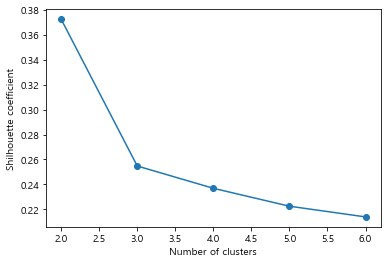

In [62]:
silhouette = []

for i in range(2,7):
    kmeans_i = KMeans(n_clusters = i, random_state = 0) # 모형 생성
    kmeans_i.fit(X_features_scaled) # 모형 훈련
    silhouette_values = silhouette_score(X_features_scaled, kmeans_i.labels_)
    silhouette.append(silhouette_values)
    
plt.plot(range(2,7), silhouette, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Shilhouette coefficient')
plt.show()

In [63]:
# 군집 수에 따른 군집 데이터 분포의 시각화 함수 정의

def clusterScatter(n_cluster, X_features): 
    c_colors = []
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)

    for i in range(n_cluster):
        c_color = cm.jet(float(i) / n_cluster) #클러스터의 색상 설정
        c_colors.append(c_color)
        #클러스터의 데이터 분포를 동그라미로 시각화
        plt.scatter(X_features[Y_labels == i,0], X_features[Y_labels == i,1],
                     marker='o', color=c_color, edgecolor='black', s=50, 
                     label='cluster '+ str(i))       
    
    #각 클러스터의 중심점을 삼각형으로 표시
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], 
                    marker='^', color=c_colors[i], edgecolor='w', s=200)
        
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

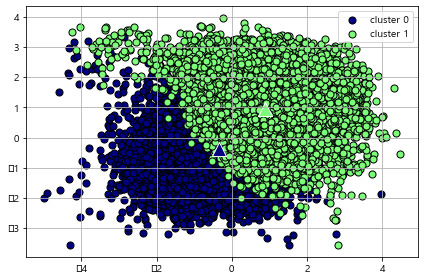

In [64]:
# k = 2
clusterScatter(2, X_features_scaled)

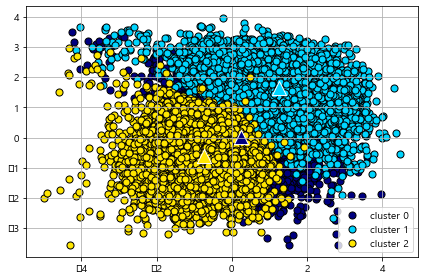

In [65]:
# k = 3
clusterScatter(3, X_features_scaled)

In [66]:
# k = 4
clusterScatter(4, X_features_scaled)

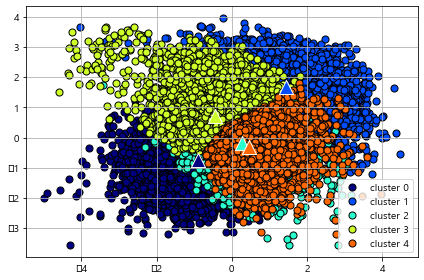

In [67]:
# k = 5
clusterScatter(5, X_features_scaled)

In [87]:
# k = 4 로 선택하고 진행
best_cluster = 4
kmeans = KMeans(n_clusters = best_cluster, random_state = 0)
Y_labels = kmeans.fit_predict(X_features_scaled)
df2['ClusterLabel'] = Y_labels
df2.head()

matchId  win  championName_Aatrox  championName_Ahri  \
0  KR_4870274470    0                  0.0                0.0   
1  KR_4870274470    1                  0.0                0.0   
2  KR_4901175026    0                  0.0                0.0   
3  KR_4901175026    1                  0.0                0.0   
4  KR_4944273316    0                  0.0                0.0   

   championName_Akali  championName_Akshan  championName_Alistar  \
0                 0.0                  0.0                   0.0   
1                 0.0                  0.0                   0.0   
2                 0.0                  0.0                   0.0   
3                 0.2                  0.0                   0.0   
4                 0.0                  0.0                   0.2   

   championName_Amumu  championName_Anivia  championName_Annie  ...  teamId  \
0                 0.0                  0.0                 0.0  ...     200   
1                 0.0                  0.0                 0.0  ...     100   
2                 0.0                  0.0                 0.0  ...     100   
3                 0.0                  0.0                 0.0  ...     200   
4                 0.0                  0.0                 0.0  ...     100   

   physicalDamageDealtToChampionsPerTime  magicDamageDealtToChampionsPerTime  \
0                               6.780758                           19.412828   
1                              10.628426                           12.233673   
2                               4.162932                            5.258645   
3                               5.937483                            6.063347   
4                               4.805683                            3.156022   

   trueDamageDealtToChampionsPerTime  totalDamageTakenPerTime  \
0                           1.090233                46.979300   
1                           2.085131                62.743878   
2                           0.506501                27.531397   
3                           0.877547                22.564500   
4                           1.564276                18.734506   

   physicalDamageDealtToChampionsPerTime_log  \
0                                   2.051654   
1                                   2.453453   
2                                   1.641505   
3                                   1.936939   
4                                   1.758837   

   magicDamageDealtToChampionsPerTime_log  \
0                                3.016164   
1                                2.582765   
2                                1.833964   
3                                1.954919   
4                                1.424558   

   trueDamageDealtToChampionsPerTime_log  totalDamageTakenPerTime_log  \
0                               0.737276                     3.870770   
1                               1.126594                     4.154873   
2                               0.409790                     3.351005   
3                               0.629966                     3.159741   
4                               0.941676                     2.982369   

   ClusterLabel  
0             3  
1             3  
2             0  
3             2  
4             2  

[5 rows x 169 columns]

In [88]:
# 중간 파일 저장
df2.to_csv('lol-clustering_4.csv')

# 군집별 특징 분석

In [89]:
# 각 군집 별 수 확인
df2.groupby('ClusterLabel')[['matchId']].count()

matchId
ClusterLabel         
0               17082
1               16643
2               11066
3                6506

In [90]:
# 모형 구축에 사용된 로그 변수 제거
df3 = df2.drop(['physicalDamageDealtToChampionsPerTime_log',
       'magicDamageDealtToChampionsPerTime_log',
       'trueDamageDealtToChampionsPerTime_log',
       'totalDamageTakenPerTime_log'], axis = 1, inplace = False)

In [91]:
clustering_result = df3.groupby('ClusterLabel').mean()
clustering_result

win  championName_Aatrox  championName_Ahri  \
ClusterLabel                                                     
0             0.550404             0.011755           0.000820   
1             0.377877             0.009794           0.002463   
2             0.588198             0.006000           0.006705   
3             0.533200             0.007532           0.007685   

              championName_Akali  championName_Akshan  championName_Alistar  \
ClusterLabel                                                                  
0                       0.007095             0.008067              0.005257   
1                       0.005924             0.007679              0.004711   
2                       0.005042             0.007663              0.005350   
3                       0.008039             0.006625              0.006210   

              championName_Amumu  championName_Anivia  championName_Annie  \
ClusterLabel                                                                
0                       0.005292             0.003536            0.000972   
1                       0.005576             0.002992            0.001045   
2                       0.008603             0.003000            0.000723   
3                       0.007593             0.003351            0.003566   

              championName_Aphelios  ...  championName_Zed  \
ClusterLabel                         ...                     
0                          0.020525  ...          0.011322   
1                          0.021703  ...          0.010671   
2                          0.017947  ...          0.011748   
3                          0.006886  ...          0.011866   

              championName_Ziggs  championName_Zilean  championName_Zoe  \
ClusterLabel                                                              
0                       0.008149             0.003594          0.005971   
1                       0.006417             0.003533          0.009662   
2                       0.004067             0.003018          0.014133   
3                       0.007624             0.006056          0.007685   

              championName_Zyra      teamId  \
ClusterLabel                                  
0                      0.001745  150.076104   
1                      0.001286  150.129183   
2                      0.001084  149.674679   
3                      0.003873  149.715647   

              physicalDamageDealtToChampionsPerTime  \
ClusterLabel                                          
0                                          5.366300   
1                                          3.640956   
2                                          5.737754   
3                                          9.000762   

              magicDamageDealtToChampionsPerTime  \
ClusterLabel                                       
0                                       4.640554   
1                                       2.689763   
2                                       3.583980   
3                                      10.059074   

              trueDamageDealtToChampionsPerTime  totalDamageTakenPerTime  
ClusterLabel                                                              
0                                      0.395780                22.263603  
1                                      0.337065                15.818836  
2                                      1.012422                22.292798  
3                                      1.186261                39.085900  

[4 rows x 163 columns]

In [92]:
# 결과 export
clustering_result.to_csv("clustering_result_3.csv")

In [96]:
# 변수명 변경
df3.loc[(df3.ClusterLabel == 0), 'ClusterLabel'] = '1번'
df3.loc[(df3.ClusterLabel == 1), 'ClusterLabel'] = '2번'
df3.loc[(df3.ClusterLabel == 2), 'ClusterLabel'] = '3번'
df3.loc[(df3.ClusterLabel == 3), 'ClusterLabel'] = '4번'

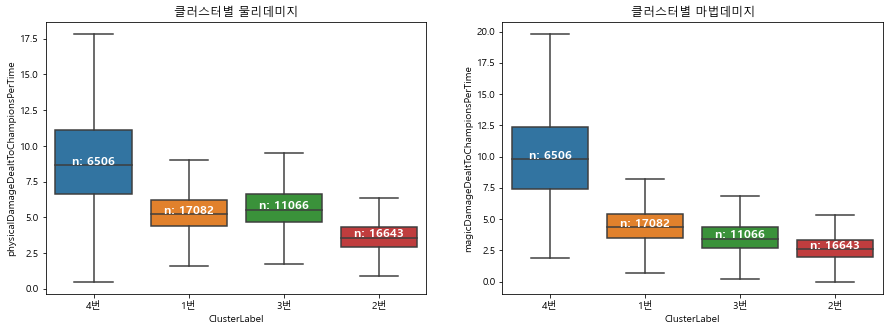

In [100]:
# 클러스터별 데미지 시각화

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.boxplot(x='ClusterLabel',y='physicalDamageDealtToChampionsPerTime',data=df3, showfliers=False)

# 중앙값
medians = df3.groupby(['ClusterLabel'])['physicalDamageDealtToChampionsPerTime'].median().to_dict()

# 관측수
nobs = df3['ClusterLabel'].value_counts().to_dict()

#키 값을 'n:'값 형식으로 변환
for key in nobs:
    nobs[key]="n: " +str(nobs[key])
    
#그래프의 Xticks text값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

#tick은 tick 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()),
    medians[label.get_text()] + 0.03, nobs[label.get_text()],
    horizontalalignment='center', size='large',color='w', weight='semibold')
    
ax.set_title('클러스터별 물리데미지')

plt.subplot(1,2,2)
ax = sns.boxplot(x='ClusterLabel',y='magicDamageDealtToChampionsPerTime',data=df3, showfliers=False)

# 중앙값
medians = df3.groupby(['ClusterLabel'])['magicDamageDealtToChampionsPerTime'].median().to_dict()

# 관측수
nobs = df3['ClusterLabel'].value_counts().to_dict()

#키 값을 'n:'값 형식으로 변환
for key in nobs:
    nobs[key]="n: " +str(nobs[key])
    
#그래프의 Xticks text값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

#tick은 tick 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()),
    medians[label.get_text()] + 0.03, nobs[label.get_text()],
    horizontalalignment='center', size='large',color='w', weight='semibold')
    
ax.set_title('클러스터별 마법데미지')
plt.show()

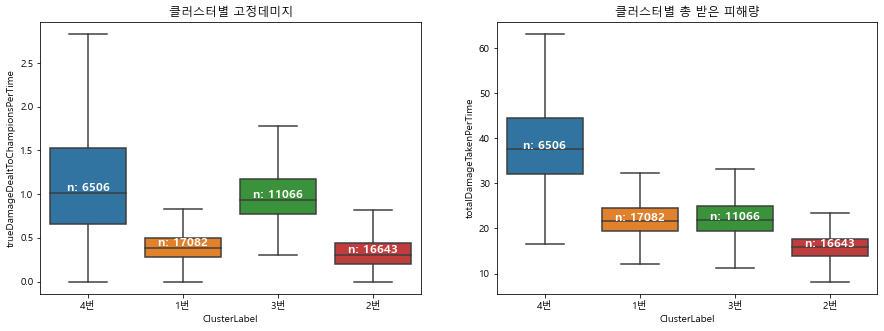

In [102]:
# 고정데미지
# 총 받은 데미지

# 클러스터별 데미지 시각화

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.boxplot(x='ClusterLabel',y='trueDamageDealtToChampionsPerTime',data=df3, showfliers=False)

# 중앙값
medians = df3.groupby(['ClusterLabel'])['trueDamageDealtToChampionsPerTime'].median().to_dict()

# 관측수
nobs = df3['ClusterLabel'].value_counts().to_dict()

#키 값을 'n:'값 형식으로 변환
for key in nobs:
    nobs[key]="n: " +str(nobs[key])
    
#그래프의 Xticks text값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

#tick은 tick 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()),
    medians[label.get_text()] + 0.03, nobs[label.get_text()],
    horizontalalignment='center', size='large',color='w', weight='semibold')
    
ax.set_title('클러스터별 고정데미지')

plt.subplot(1,2,2)
ax = sns.boxplot(x='ClusterLabel',y='totalDamageTakenPerTime',data=df3, showfliers=False)

# 중앙값
medians = df3.groupby(['ClusterLabel'])['totalDamageTakenPerTime'].median().to_dict()

# 관측수
nobs = df3['ClusterLabel'].value_counts().to_dict()

#키 값을 'n:'값 형식으로 변환
for key in nobs:
    nobs[key]="n: " +str(nobs[key])
    
#그래프의 Xticks text값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

#tick은 tick 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()),
    medians[label.get_text()] + 0.03, nobs[label.get_text()],
    horizontalalignment='center', size='large',color='w', weight='semibold')
    
ax.set_title('클러스터별 총 받은 피해량')
plt.show()
